## NLP Toolkits and Preprocessing (beginning)

In this beginning I use a dataset from https://www.kaggle.com/snap/amazon-fine-food-reviews to star my studies in NLP.
The original dataset contains a large number of records for many products. In this case I use one product, an oat cookie that received the most analysis.

The Natural Language Toolkit, or more commonly NLTK, is a suite of libraries and programs for symbolic and statistical natural language processing (NLP). NLTK supports classification, tokenization, stemming, tagging, parsing, and semantic reasoning functionalities.

In [1]:
#!pip install nltk
import nltk
import pandas as pd

In [2]:
# importing the data
data = pd.read_csv('cookie_reviews.csv')
data.tail()

,user_id,stars,reviews
908,A366PSH7KFLRPB,5,I loved these cookies and so did my kids. You ...
909,A2KV6EYQPKJRR5,5,This is a great tasting cookie. It is very sof...
910,A3O7REI0OSV89M,4,These are great for a quick snack! They are sa...
911,A9JS5GQQ6GIQT,5,I love the Quaker soft baked cookies. The rea...
912,AMAVEZAGCH52H,5,This cookie is really good and works really we...


User Id is an identification, the stars is the classification that each consumer gives for each cookie (1~5) and reviews are  commentaries.

In [3]:
# use a describe to evaluate the cookie classification
data.describe()

,stars
count,913.000000
mean,4.582694
std,0.705560
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [4]:
# proportion of cookie classification
data.stars.value_counts(normalize=True)

5    0.683461
4    0.237678
3    0.061336
2    0.013143
1    0.004381
Name: stars, dtype: float64

68% of classification is 5 star (this cookie is very good!) and less than 7% rate it with 1 to 3 stars

In [5]:
# looking at length reviews
data.reviews.map(len).value_counts().head()

134    10
157     9
137     8
107     8
132     8
Name: reviews, dtype: int64

In [6]:
# Importing the seaborn to data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set_palette('dark')
sns.set_context('talk')

%matplotlib inline

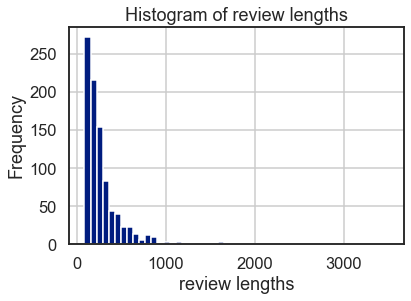

In [17]:
# histogram of review lengths
ax = data.reviews.map(len).hist(bins=50)
ax.set(xlabel='review lengths', ylabel='Frequency', title='Histogram of review lengths');

In [8]:
# looking at one full review
data.iloc[1,2]

'Quaker Soft Baked Oatmeal Cookies with raisins are a delicious treat, great for anytime of day.  For example:<br /><br />--at breakfast, I had one with a large banana and a cup of coffee, and felt I\'d had a relatively "healthy" start to the day.<br /><br />--the next day at lunch, following a tuna sandwich, I had one with a glass of milk, and was satisfied enough to not need a snack before dinner at 6:30.<br /><br />--the following night, after dinner, I had one with the remainder of my glass of wine. (Delicious!) And again, didn\'t feel the need to snack later in the evening.<br /><br />Each cookie is individually packaged, and their texture is soft and moist, with just the right amount of sweetness. Natural flavors used in the making are Cinnamon and All Spice.  These flavorings give the cookies a real old-fashioned, homemade taste.<br /><br />Nutritionally, the cookies have 170 calories each, 1.5g saturated fat, 150 mg sodium, and 12g sugar. They also have 2g of protein, and conta

We can see many problems with data importation. Now I start the pre-process by removing the numbers and putting all the letters in lower case

In [9]:
import re

lower_alpha = lambda x: re.sub(r"""\w*\d\w*""", ' ', x.lower())
data['reviews'] = data.reviews.map(lower_alpha)

data.head()

,user_id,stars,reviews
0,A368Z46FIKHSEZ,5,i love these cookies! not only are they healt...
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...
3,A31CYJQO3FL586,5,i participated in a product review that includ...
4,A2KXQ2EKFF3K2G,5,my kids loved these. i was very pleased to giv...


In [10]:
# remove all punctuations
import string

punc_re = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
data['reviews'] = data.reviews.map(punc_re)

data.head()

,user_id,stars,reviews
0,A368Z46FIKHSEZ,5,i love these cookies not only are they healt...
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...
3,A31CYJQO3FL586,5,i participated in a product review that includ...
4,A2KXQ2EKFF3K2G,5,my kids loved these i was very pleased to giv...


In [11]:
# looking for a complete review after the initial treatment
data.iloc[1,2]

'quaker soft baked oatmeal cookies with raisins are a delicious treat  great for anytime of day   for example  br    br     at breakfast  i had one with a large banana and a cup of coffee  and felt i d had a relatively  healthy  start to the day  br    br     the next day at lunch  following a tuna sandwich  i had one with a glass of milk  and was satisfied enough to not need a snack before dinner at      br    br     the following night  after dinner  i had one with the remainder of my glass of wine   delicious   and again  didn t feel the need to snack later in the evening  br    br   each cookie is individually packaged  and their texture is soft and moist  with just the right amount of sweetness  natural flavors used in the making are cinnamon and all spice   these flavorings give the cookies a real old fashioned  homemade taste  br    br   nutritionally  the cookies have   calories each      saturated fat    mg sodium  and   sugar  they also have   of protein  and contain   of fib

Tokenization is the process of breaking down text document apart into those pieces. In text analytics, tokens are most frequently just words. A sentence of 10 words, then, would contain 10 tokens.

In [12]:
# tokenization reviews
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

data['tokens'] = data.reviews.map(word_tokenize)
data.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,user_id,stars,reviews,tokens
0,A368Z46FIKHSEZ,5,i love these cookies not only are they healt...,"[i, love, these, cookies, not, only, are, they..."
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...,"[quaker, soft, baked, oatmeal, cookies, with, ..."
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...,"[i, am, usually, not, a, huge, fan, of, oatmea..."
3,A31CYJQO3FL586,5,i participated in a product review that includ...,"[i, participated, in, a, product, review, that..."
4,A2KXQ2EKFF3K2G,5,my kids loved these i was very pleased to giv...,"[my, kids, loved, these, i, was, very, pleased..."


In [13]:
# creating a list combining all tokens
word_list = sum(data.tokens.tolist(), [])
word_list[:10]

['i',
 'love',
 'these',
 'cookies',
 'not',
 'only',
 'are',
 'they',
 'healthy',
 'but']

In [14]:
# finding the most commun words

from collections import Counter

# converting the list in a dictionary with values count
word_counts = Counter(word_list)

# reverting the key / values in the dictionary to be able to sort
word_counts = list(zip(word_counts.values(), word_counts.keys()))

# sorting the list by count
word_counts = sorted(word_counts, reverse=True)

# print
word_counts[:10]

[(2145, 'i'),
 (1755, 'and'),
 (1652, 'the'),
 (1310, 'a'),
 (1028, 'it'),
 (991, 'to'),
 (845, 'my'),
 (843, 'cookies'),
 (842, 'cookie'),
 (780, 'of')]

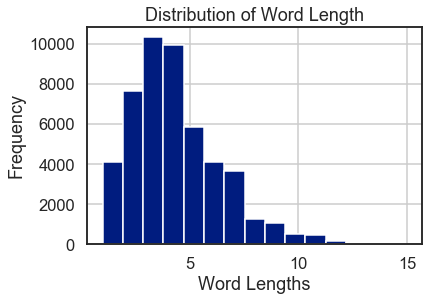

In [15]:
# histogram from word length
word_lengths = pd.Series([len(x) for x in word_list])

ax = word_lengths.hist(bins=15)
ax.set(xlabel='Word Lengths', ylabel='Frequency', title='Distribution of Word Length');

#### Stop Words

In natural language processing, useless words, are referred to as stop words. A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

In [18]:
# Removing the stop words
from nltk.corpus import stopwords
nltk.download("stopwords")

stop_words = stopwords.words('english')

stop_lambda = lambda x: [y for y in x if y not in stop_words]
data['tokens_stop'] = data.tokens.apply(stop_lambda)
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,user_id,stars,reviews,tokens,tokens_stop
0,A368Z46FIKHSEZ,5,i love these cookies not only are they healt...,"[i, love, these, cookies, not, only, are, they...","[love, cookies, healthy, taste, great, soft, d..."
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...,"[quaker, soft, baked, oatmeal, cookies, with, ...","[quaker, soft, baked, oatmeal, cookies, raisin..."
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...,"[i, am, usually, not, a, huge, fan, of, oatmea...","[usually, huge, fan, oatmeal, cookies, literal..."
3,A31CYJQO3FL586,5,i participated in a product review that includ...,"[i, participated, in, a, product, review, that...","[participated, product, review, included, samp..."
4,A2KXQ2EKFF3K2G,5,my kids loved these i was very pleased to giv...,"[my, kids, loved, these, i, was, very, pleased...","[kids, loved, pleased, give, kids, quick, go, ..."


#### Spech tagging

Speech tagging also called grammatical tagging is the process of marking up a word in a text as corresponding to a particular part of speech, based on both its definition and its context. A simplified form of this is commonly taught to school-age children, in the identification of words as nouns, verbs, adjectives, adverbs, etc...

In [19]:
# speech tagging  (functional in text analysis -context)
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
pos_lambda = lambda x: nltk.pos_tag(x)
data['tokens_pos'] = (data.tokens_stop.apply(pos_lambda))
data.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,user_id,stars,reviews,tokens,tokens_stop,tokens_pos
0,A368Z46FIKHSEZ,5,i love these cookies not only are they healt...,"[i, love, these, cookies, not, only, are, they...","[love, cookies, healthy, taste, great, soft, d...","[(love, VB), (cookies, NNS), (healthy, JJ), (t..."
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...,"[quaker, soft, baked, oatmeal, cookies, with, ...","[quaker, soft, baked, oatmeal, cookies, raisin...","[(quaker, NN), (soft, JJ), (baked, VBD), (oatm..."
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...,"[i, am, usually, not, a, huge, fan, of, oatmea...","[usually, huge, fan, oatmeal, cookies, literal...","[(usually, RB), (huge, JJ), (fan, NN), (oatmea..."
3,A31CYJQO3FL586,5,i participated in a product review that includ...,"[i, participated, in, a, product, review, that...","[participated, product, review, included, samp...","[(participated, JJ), (product, NN), (review, N..."
4,A2KXQ2EKFF3K2G,5,my kids loved these i was very pleased to giv...,"[my, kids, loved, these, i, was, very, pleased...","[kids, loved, pleased, give, kids, quick, go, ...","[(kids, NNS), (loved, VBD), (pleased, JJ), (gi..."


#### Stemming

In linguistic morphology and information retrieval, stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form - generally a written word form. The stem need not be identical to the morphological root of the word; it is usually sufficient that related words map to the same stem, even if this stem is not in itself a valid root. Algorithms for stemming have been studied in computer science since the 1960s. Many search engines treat words with the same stem as synonyms as a kind of query expansion, a process called conflation.

In [20]:
# stemming
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')
stem_lambda = lambda x: [stemmer.stem(y) for y in x]

data['tokens_stem'] = data.tokens_stop.apply(stem_lambda)
data.head()

,user_id,stars,reviews,tokens,tokens_stop,tokens_pos,tokens_stem
0,A368Z46FIKHSEZ,5,i love these cookies not only are they healt...,"[i, love, these, cookies, not, only, are, they...","[love, cookies, healthy, taste, great, soft, d...","[(love, VB), (cookies, NNS), (healthy, JJ), (t...","[love, cooki, healthi, tast, great, soft, defi..."
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...,"[quaker, soft, baked, oatmeal, cookies, with, ...","[quaker, soft, baked, oatmeal, cookies, raisin...","[(quaker, NN), (soft, JJ), (baked, VBD), (oatm...","[quaker, soft, bake, oatmeal, cooki, raisin, d..."
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...,"[i, am, usually, not, a, huge, fan, of, oatmea...","[usually, huge, fan, oatmeal, cookies, literal...","[(usually, RB), (huge, JJ), (fan, NN), (oatmea...","[usual, huge, fan, oatmeal, cooki, liter, melt..."
3,A31CYJQO3FL586,5,i participated in a product review that includ...,"[i, participated, in, a, product, review, that...","[participated, product, review, included, samp...","[(participated, JJ), (product, NN), (review, N...","[particip, product, review, includ, sampl, hre..."
4,A2KXQ2EKFF3K2G,5,my kids loved these i was very pleased to giv...,"[my, kids, loved, these, i, was, very, pleased...","[kids, loved, pleased, give, kids, quick, go, ...","[(kids, NNS), (loved, VBD), (pleased, JJ), (gi...","[kid, love, pleas, give, kid, quick, go, healt..."


#### Lemmatisation

Lemmatisation in linguistics is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form.

In computational linguistics, lemmatisation is the algorithmic process of determining the lemma of a word based on its intended meaning. Unlike stemming, lemmatisation depends on correctly identifying the intended part of speech and meaning of a word in a sentence, as well as within the larger context surrounding that sentence, such as neighboring sentences or even an entire document. As a result, developing efficient lemmatisation algorithms is an open area of research.

In [21]:
# Lemmatisation
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('all')

# Convert the naming scheme to one that is recognized by WordNet
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

lemmatizer = WordNetLemmatizer()
lemmatizer_fun = lambda x: lemmatizer.lemmatize(*x)
data['tokens_lemma'] = data.tokens_pos\
                        .apply(lambda x: [(y[0], get_wordnet_pos(y[1])) for y in x])\
                        .apply(lambda x: [lemmatizer_fun(y) for y in x])

# print
data.head().T

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package 

[nltk_data]    |   Package ppattach is already up-to-date!
[nltk_data]    | Downloading package problem_reports to
[nltk_data]    |     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package problem_reports is already up-to-date!
[nltk_data]    | Downloading package propbank to
[nltk_data]    |     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package propbank is already up-to-date!
[nltk_data]    | Downloading package ptb to
[nltk_data]    |     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package ptb is already up-to-date!
[nltk_data]    | Downloading package product_reviews_1 to
[nltk_data]    |     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_1 is already up-to-date!
[nltk_data]    | Downloading package product_reviews_2 to
[nltk_data]    |     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_2 is already up-to-date!
[nltk_data]    | Downloading pa

[nltk_data]    |   Package large_grammars is already up-to-date!
[nltk_data]    | Downloading package tagsets to
[nltk_data]    |     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package tagsets is already up-to-date!
[nltk_data]    | Downloading package snowball_data to
[nltk_data]    |     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package snowball_data is already up-to-date!
[nltk_data]    | Downloading package bllip_wsj_no_aux to
[nltk_data]    |     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package bllip_wsj_no_aux is already up-to-date!
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    

,0,1,2,3,4
user_id,A368Z46FIKHSEZ,A1JAPP1CXRG57A,A2Z9JNXPIEL2B9,A31CYJQO3FL586,A2KXQ2EKFF3K2G
stars,5,5,5,5,5
reviews,i love these cookies not only are they healt...,quaker soft baked oatmeal cookies with raisins...,i am usually not a huge fan of oatmeal cookies...,i participated in a product review that includ...,my kids loved these i was very pleased to giv...
tokens,"[i, love, these, cookies, not, only, are, they...","[quaker, soft, baked, oatmeal, cookies, with, ...","[i, am, usually, not, a, huge, fan, of, oatmea...","[i, participated, in, a, product, review, that...","[my, kids, loved, these, i, was, very, pleased..."
tokens_stop,"[love, cookies, healthy, taste, great, soft, d...","[quaker, soft, baked, oatmeal, cookies, raisin...","[usually, huge, fan, oatmeal, cookies, literal...","[participated, product, review, included, samp...","[kids, loved, pleased, give, kids, quick, go, ..."
tokens_pos,"[(love, VB), (cookies, NNS), (healthy, JJ), (t...","[(quaker, NN), (soft, JJ), (baked, VBD), (oatm...","[(usually, RB), (huge, JJ), (fan, NN), (oatmea...","[(participated, JJ), (product, NN), (review, N...","[(kids, NNS), (loved, VBD), (pleased, JJ), (gi..."
tokens_stem,"[love, cooki, healthi, tast, great, soft, defi...","[quaker, soft, bake, oatmeal, cooki, raisin, d...","[usual, huge, fan, oatmeal, cooki, liter, melt...","[particip, product, review, includ, sampl, hre...","[kid, love, pleas, give, kid, quick, go, healt..."
tokens_lemma,"[love, cooky, healthy, taste, great, soft, def...","[quaker, soft, bake, oatmeal, cooky, raisins, ...","[usually, huge, fan, oatmeal, cooky, literally...","[participated, product, review, include, sampl...","[kid, love, pleased, give, kid, quick, go, hea..."


In [22]:
# After I clean the dataset, I print the most commun words

# Creating a list with all tokens
word_list_clean = sum(data.tokens_stop.tolist(), [])

# print
word_list_clean[:10]

['love',
 'cookies',
 'healthy',
 'taste',
 'great',
 'soft',
 'definitely',
 'add',
 'grocery',
 'list']

#### Finding the most commun words

In [23]:
# converting the list in a dictionary with values count
word_counts_clean = Counter(word_list_clean)
a = word_counts_clean

# reverting the key / values in the dictionary to be able to sort
word_counts_clean = list(zip(word_counts_clean.values(), word_counts_clean.keys()))

# sorting the list by count
word_counts_clean = sorted(word_counts_clean, reverse=True)

# print
word_counts_clean[:10]

[(843, 'cookies'),
 (842, 'cookie'),
 (707, 'soft'),
 (482, 'oatmeal'),
 (379, 'br'),
 (349, 'good'),
 (343, 'quaker'),
 (297, 'like'),
 (294, 'taste'),
 (291, 'love')]

Now, with those words, the analysis is much more consistent. 

#### Word Cloud

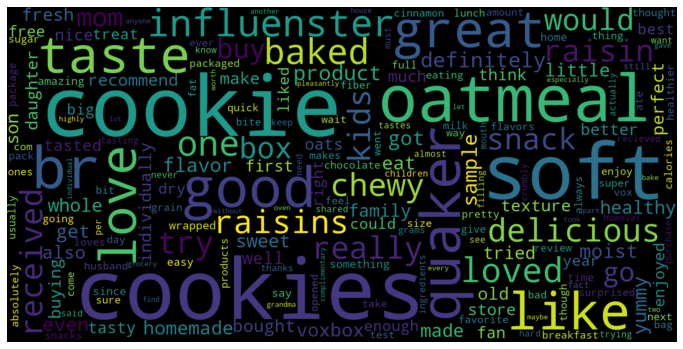

In [24]:
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = word_list_clean
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).fit_words(a)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


And with this visualization much more interesting